In [2]:
from matplotlib import pyplot as plt
import re

In [3]:
cmds = []
results = []
for line in open("task.logs/result.txt"):
    if line[0] not in "0123456789":
        continue
    cmd = {}
    splits = re.split("\s+", line.strip())
    key = None
    for ele in splits:
        if ele.startswith("--"):
            key = ele
            continue
        if key is not None:
            cmd[key] = ele
            key = None
    cmds.append(cmd)
    results.append(float(splits[-1]))


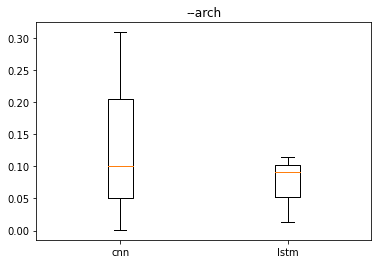

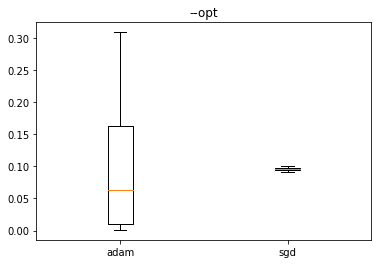

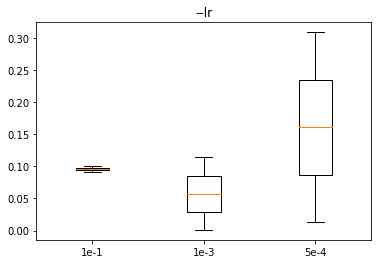

In [15]:
all_keys = cmds[0].keys()

for key in all_keys:
    xs = []
    for ele in cmds:
        xs.append(ele[key])
    if len(set(xs)) == 1:
        continue
    labels = sorted(list(set(xs)))
    data = []
    for label in labels:
        _data = []
        for x, y in zip(xs, results):
            if x == label:
                _data.append(y)
        data.append(_data)
    plt.figure()
    plt.title(key)
    # plt.scatter(xs, results, marker='.')
    plt.boxplot(data, labels=labels)